In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
plt.style.use('bmh')

In [3]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.shape

(3631, 6)

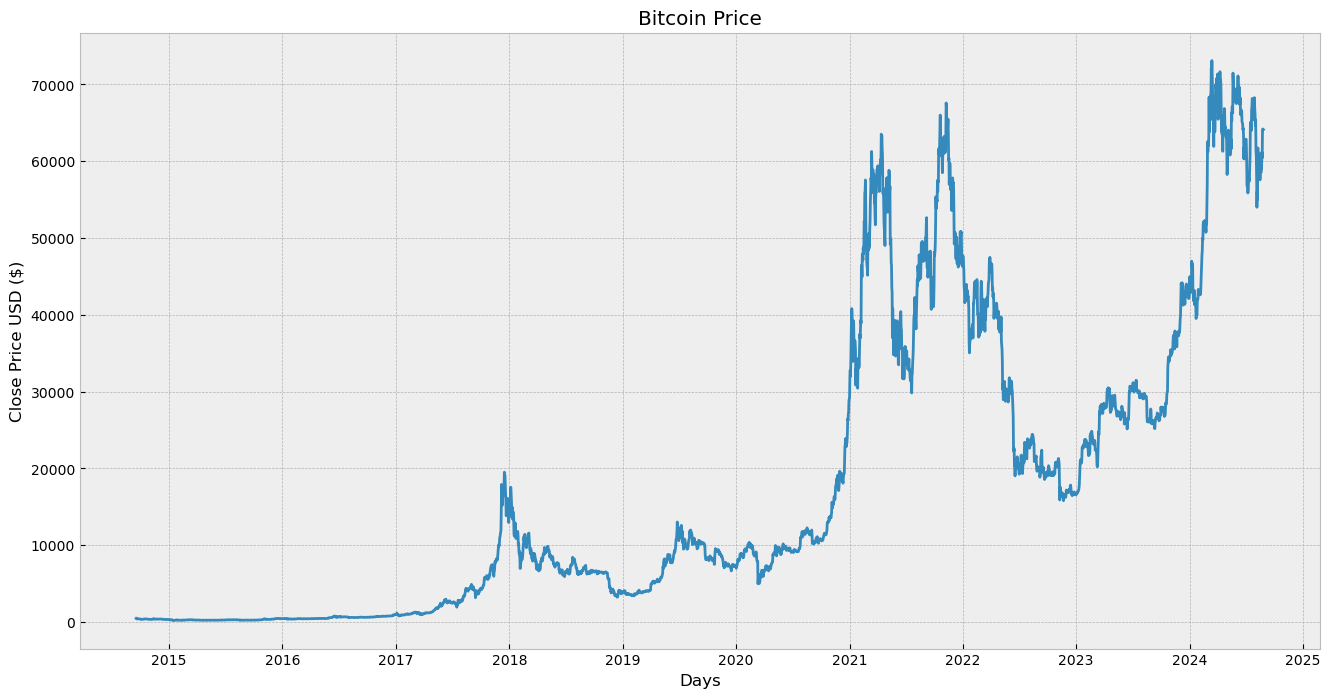

In [6]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin Price')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()


In [7]:
df = df[['Close']]
df.head(4)

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992


In [9]:
future_days = 25
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_6883/1859025733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


,Close,Prediction
Date,,
2014-09-17,457.334015,378.549011
2014-09-18,424.440002,390.414001
2014-09-19,394.795990,400.869995
2014-09-20,408.903992,394.773010


In [11]:
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[  457.33401489]
 [  424.44000244]
 [  394.79598999]
 ...
 [66819.9140625 ]
 [66201.015625  ]
 [64619.25      ]]


In [13]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  378.54901123   390.41400146   400.86999512 ... 64094.35546875
 64178.9921875  64097.87890625]


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [17]:
x_future = df.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[55849.109375  ],
       [56705.09765625],
       [58009.2265625 ],
       [57742.49609375],
       [57344.9140625 ],
       [57899.46484375],
       [59231.953125  ],
       [60787.79296875],
       [64870.15234375],
       [65097.1484375 ],
       [64118.79296875],
       [63974.06640625],
       [66710.15625   ],
       [67163.6484375 ],
       [68154.5234375 ],
       [67585.25      ],
       [65927.671875  ],
       [65372.1328125 ],
       [65777.2265625 ],
       [67912.0625    ],
       [67813.3359375 ],
       [68255.8671875 ],
       [66819.9140625 ],
       [66201.015625  ],
       [64619.25      ]])

In [18]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)


[36894.40625    61415.06640625 60680.09375    58116.9765625
 53991.45703125 56034.31640625 58323.953125   61710.13671875
 60880.11328125 60945.8125     65097.1484375  68364.9921875
 60609.56640625 62334.81640625 55849.109375   58894.10546875
 59478.97265625 58483.96484375 59493.453125   59012.79296875
 61175.19140625 55849.109375   64094.35546875 64178.9921875
 64097.87890625]

[55884.67911168 56731.14477311 58020.76562587 57757.00245574
 57363.84340856 57912.22497421 59229.8897122  60768.42129173
 64805.36561006 65029.83643851 64062.36488883 63919.24836711
 66624.90000983 67073.34722909 68053.19903389 67490.25859724
 65851.12054515 65301.76169259 65702.34889284 67813.43540356
 67715.80714525 68153.41536424 66733.4367987  66121.4234257
 64557.25448166]


/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_6883/1714751950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


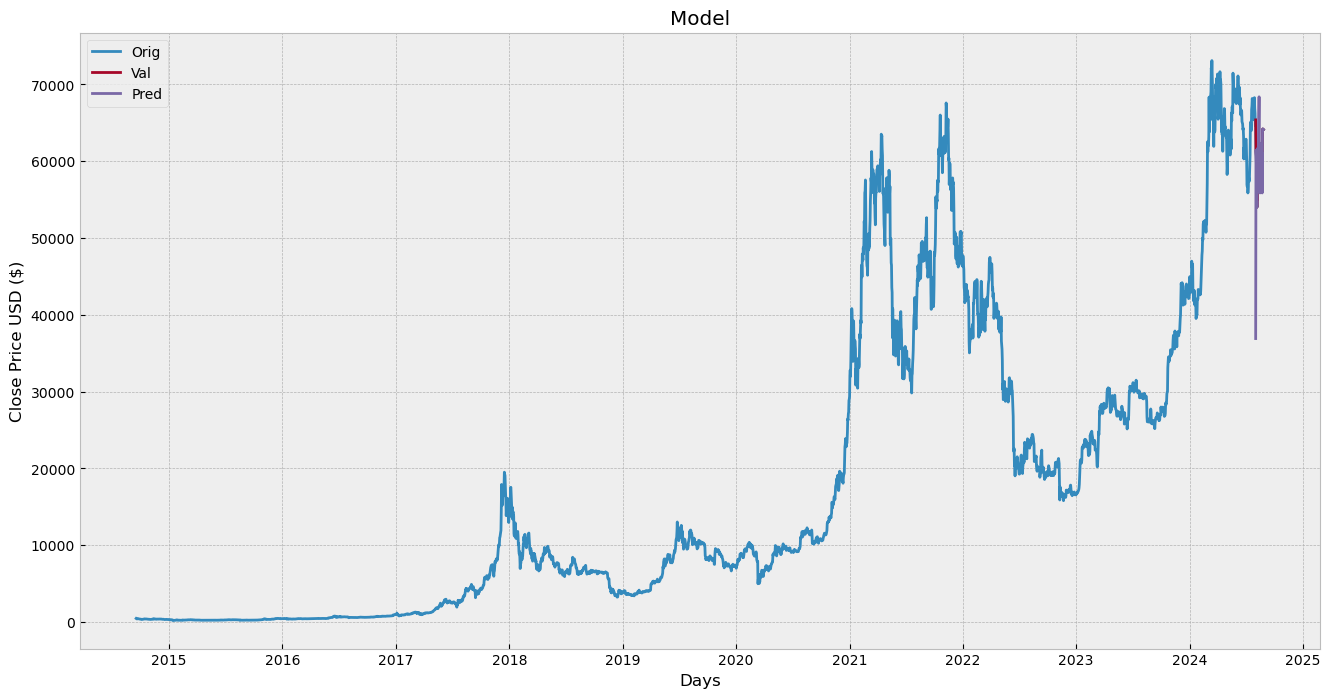

In [19]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_6883/964357659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


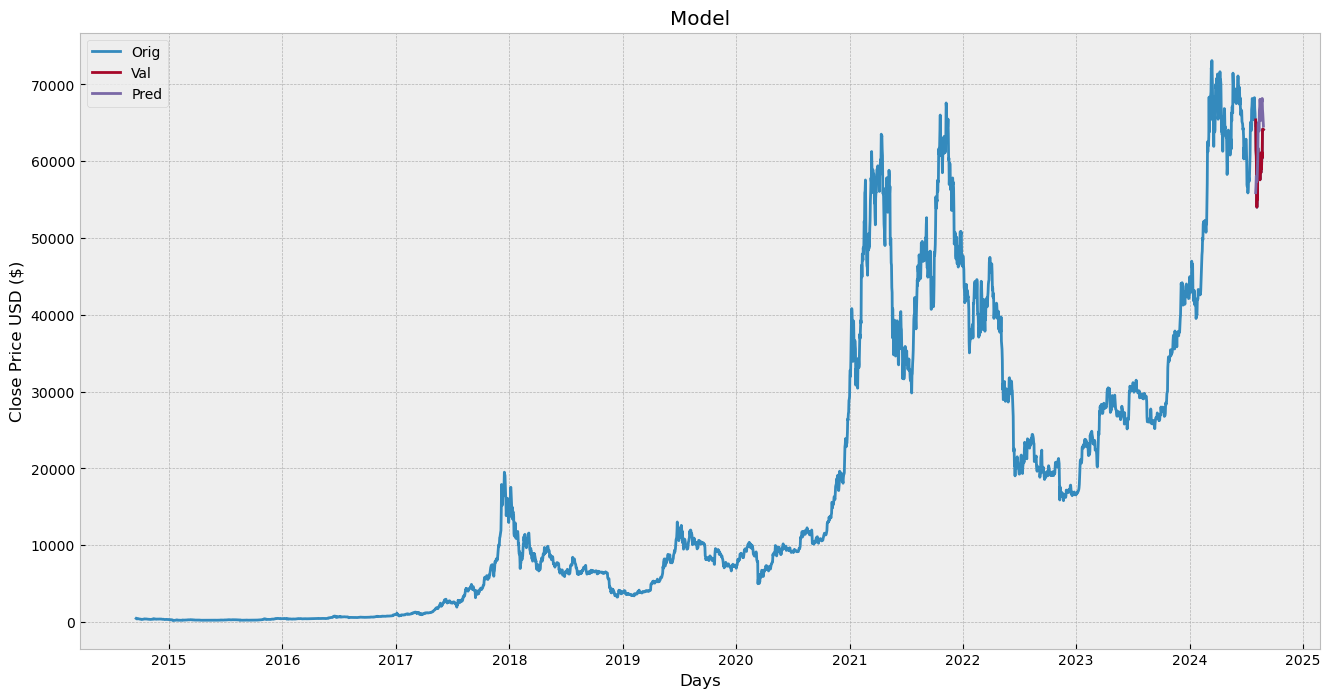

In [20]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()